## Flipkart Product Semantic Search with Transformers ##
This notebook demonstrates how to build a semantic search engine for e-commerce products using **Transformer-based** sentence embeddings.
Instead of keyword matching, we use vector-based similarity to find products that best match the **intent and meaning** of a user query.

### 1. Import libraries & load data ###

In [19]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Load your dataset (adjust path if needed)
df = pd.read_csv('/kaggle/input/flipkart-products/flipkart_com-ecommerce_sample.csv')

# Quick look at the data
print(df.head())


                            uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4  bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/fabhomedecor-fabric-do...   
2  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/sicons-all-purpose-arn...   

                            product_name  \
0    Alisha Solid Women's Cycling Shorts   
1    FabHomeDecor Fabric Double Sofa Bed   
2                             AW Bellies   
3    Alisha Solid Women's Cycling Shorts   
4  Sicons All Purpose Arnica Dog Shampoo   

 

### 2. Prepare the model and encode product descriptions ###
We use the `all-MiniLM-L6-v2` model from the `sentence-transformers` library to encode product descriptions into semantic vectors.

In [21]:
# Load pretrained SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Extract product descriptions (handle missing descriptions)
product_descriptions = df['description'].fillna("").tolist()

# Generate embeddings tensor
embeddings = model.encode(product_descriptions, convert_to_tensor=True)


Batches:   0%|          | 0/625 [00:00<?, ?it/s]

### 3. Define semantic search function ###
This function finds and returns the most semantically similar product descriptions to a user query using cosine similarity.

In [24]:
def search_products(query, top_k=5):
    # Encode the user query
    query_vec = model.encode([query], convert_to_tensor=True)
    
    # Compute cosine similarity scores between query and product embeddings
    cos_scores = util.cos_sim(query_vec, embeddings)[0]
    
    # Get top_k highest scores' indices
    top_results = np.argpartition(-cos_scores.cpu(), range(top_k))[:top_k]
    
    print(f"\n🔎 Search results for: '{query}'\n")
    for idx in top_results:
        idx = int(idx)  # ensure idx is int
        print(f"📌 Product: {df['product_name'].iloc[idx]}")
        print(f"📝 Description: {df['description'].iloc[idx][:150]}...\n")


### 4. Try a Sample Query ###
You can change the query to any product-related phrase to see results.

In [25]:
search_products("wireless bluetooth headphones")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


🔎 Search results for: 'wireless bluetooth headphones'

📌 Product: Tech Yug BH-503 bluethooth headset Wireless Bluetooth Headset
📝 Description: Key Features of Tech Yug BH-503 bluethooth headset Wireless Bluetooth Headset Headset Design: Over the Head Type: On the Ear Inline Remote Compatible ...

📌 Product: Dyna Silver Heart Stereo Wireless Bluetooth Headset
📝 Description: Buy Dyna Silver Heart Stereo Wireless Bluetooth Headset only for Rs. 1849 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free...

📌 Product: NEWGEN TECH EO-HS3303 194 Wired Headset
📝 Description: Key Features of NEWGEN TECH EO-HS3303 194 Wired Headset SAMSUNG GALAXY S5 MINI HIGH QUALITY SOUND DEEP BASS,NEWGEN TECH EO-HS3303 194 Wired Headset (W...

📌 Product: THERISE MD0005 Wired Headset
📝 Description: Key Features of THERISE MD0005 Wired Headset Headset Design: Earbud Type: In the Ear Compatible Devices: Mobile, Computer,Specifications of THERISE MD...

📌 Product: LIFE LIKE HBS-730 WITH MIC

### Explanations

- We use `np.argpartition` for efficient retrieval of the top-k highest similarity scores.
- The `.cpu()` call moves the tensor to the CPU before converting it to a NumPy array, since embeddings are PyTorch tensors.
- We handle missing product descriptions by filling NaNs with empty strings (`.fillna("")`).
- We explicitly cast `idx` to an integer to avoid indexing errors.


### 5.Distribution of Product Description Lengths

This plot shows the distribution of the number of characters in product descriptions.  
It helps us understand the typical length of descriptions in the dataset and detect any outliers or very short/long descriptions.


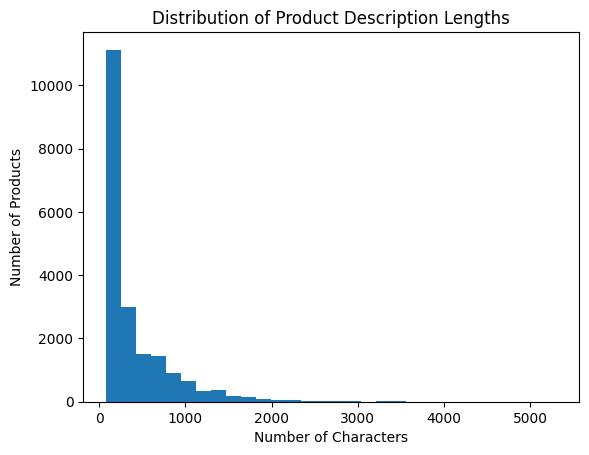

In [29]:
# Remove any missing descriptions before calculating their lengths
desc_lengths = df['description'].dropna().str.len()

plt.hist(desc_lengths, bins=30)
plt.title("Distribution of Product Description Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Products")
plt.show()


**Explanation:**
We first drop any rows where the description is missing (NaN), because calculating length on missing values causes warnings. Then we compute the length of each product description and plot the histogram of these lengths to understand their distribution.

### 8. Next Steps ###

- Wrap the search system into a **web app** using [Gradio](https://gradio.app) or [Streamlit](https://streamlit.io).  
- **Fine-tune** the transformer model using domain-specific (e.g., e-commerce) data.  
- Expand the semantic search system to include **images**, **customer reviews**, or **pricing filters**.


# Flipkart Product Semantic Search with Transformers

This notebook demonstrates a semantic search system for e-commerce products using pre-trained transformer embeddings.

**Dataset:** [Flipkart Products Dataset on Kaggle](https://www.kaggle.com/datasets/PromptCloudHQ/flipkart-products)

**GitHub Repository:** [https://github.com/ozlemelo/flipkart_semantic_search_transformers](https://github.com/ozlemelo/flipkart_semantic_search_transformers)

---

Feel free to check the GitHub repo for more details and usage instructions.
